In [12]:
# To find C with initial condition.
import math as m
def c(x,y):
    c = (y-((np.exp(x)/2)-((3*np.exp(-x))/2)))/np.exp(-2*x)
    return c
print(c(-1,1))
print(c(-1,-3))

0.6622609108098442
0.1209197778633934


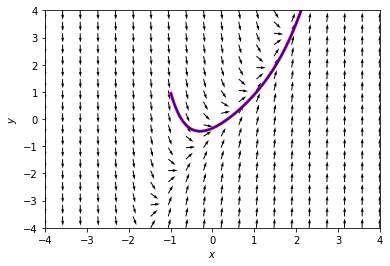

In [13]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 
fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (3*np.sinh(x[0]))-(2*x[1])  ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-1,1]]
color=['r']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 3)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-4,4,20),np.linspace(-4,4,20) )

V = (3*np.sinh(X))-(2*Y)   ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = np.linspace(-4,4,20)
y_exact = (0.6622609108098442*np.exp(-2*S[:,0]))+((np.exp(S[:,0])/2)-((3*np.exp(-S[:,0]))/2))
plt.plot(S[:,0], y_exact, color = "b")




##Limits of the graph
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

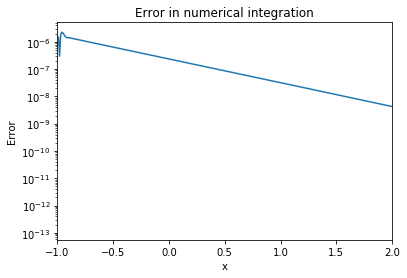

In [14]:
#With the first initial condition
list_error=[]
for e in S:
    list_error.append(e[1])
y_diff = np.abs(list_error - y_exact)
plt.semilogy(S[:,0], y_diff)
plt.ylabel("Error")
plt.xlim(-1,2)
plt.xlabel("x")
plt.title("Error in numerical integration");
plt.show()

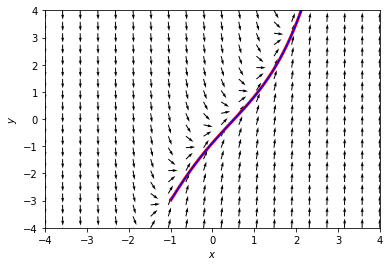

In [15]:
fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (3*np.sinh(x[0]))-(2*x[1])  ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-1,-3]]
color=['r']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 3)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-4,4,20),np.linspace(-4,4,20) )

V = (3*np.sinh(X))-(2*Y)   ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = np.linspace(-4,4,20)
y_exact1 = (0.1209197778633934*np.exp(-2*S[:,0]))+((np.exp(S[:,0])/2)-((3*np.exp(-S[:,0]))/2))
plt.plot(S[:,0], y_exact1, color = "b")




##Limits of the graph
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

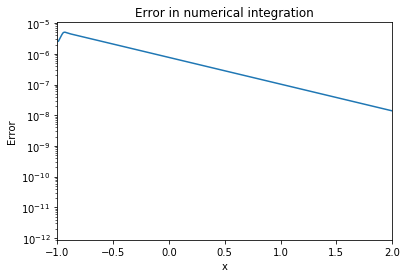

In [16]:
#With the first initial condition
list_error=[]
for e in S:
    list_error.append(e[1])
y_diff = np.abs(list_error - y_exact1)
plt.semilogy(S[:,0], y_diff)
plt.ylabel("Error")
plt.xlim(-1,2)
plt.xlabel("x")
plt.title("Error in numerical integration");
plt.show()